# Autoencoders

## Contents

* What is an Autoencoder (AE)?
* Autoencoder training
* Types of autoencoders
* Undercomplete/Overcomplete autoencoders
* Regularized autoencoders: Sparse AE
* Regularized autoencoders: Denoising AE
* Variational autoencoder (VAE)

## What is an autoencoder?

- An autoencoder is a type of artificial neural network used to learn efficient representations of data, typically for the purposes of dimensionality reduction or feature learning. 
- It works by trying to compress the input data into a lower-dimensional code and then reconstructing the output from this representation, such that the output is as similar to the input as possible.

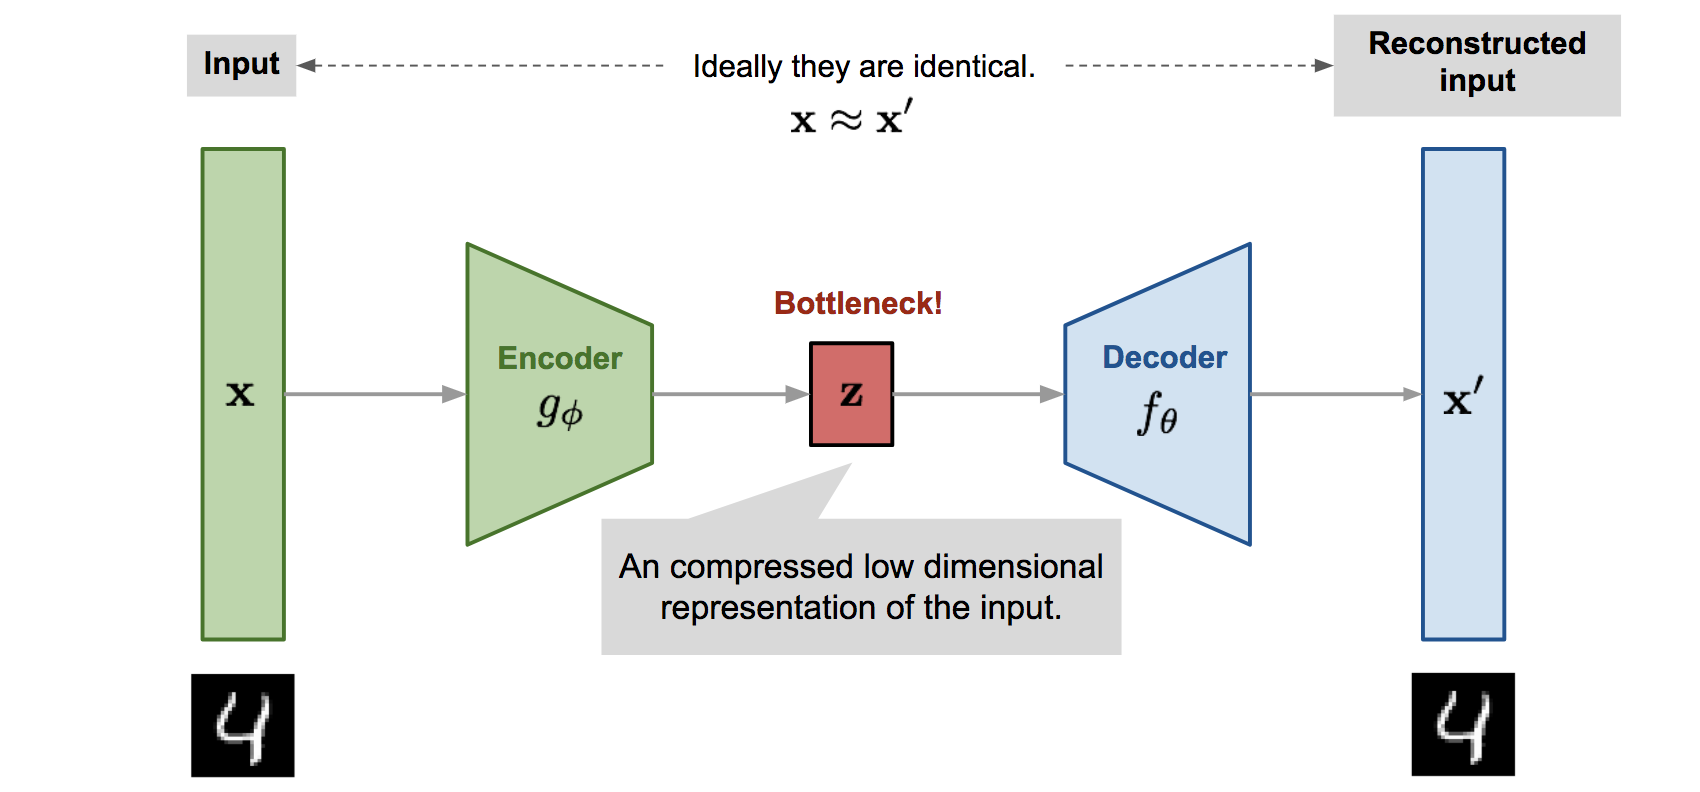

[Source](https://lilianweng.github.io/posts/2018-08-12-vae/)

An autoencoder consists of the two parts: **encoder** and **decoder**.

### Encoder

The encoder compresses the input data into a lower-dimensional space (called the **latent space**, **code** or **bottleneck**). It typically consists of several layers of neurons that reduce the dimensionality of the input data.
   
$$ h = f(x) $$

Where $h$ is the latent representation, $x$ is the input data, and $f$ represents the encoding function (typically a neural network).

The **code** often smaller in dimension than the input and captures the essential features of the data.

### Decoder

The decoder tries to reconstruct the input data from the latent representation. It performs the inverse operation of the encoder, aiming to map the compressed data back to its original form.

$$ \hat{x} = g(h) $$

Where $\hat{x}$ is the reconstructed output and $g$ represents the decoding function.


## Autoencoder Training

Thus, the autoencoder implements the following problem:

$$ \hat{x} = g(f(x)) $$

where $x \in \mathbf{R}^{n}$, $f: \mathbf{R}^{n} \rightarrow \mathbf{R}^{d}$, $g: \mathbf{R}^{d} \rightarrow \mathbf{R}^{n}$.

Since an autoencoder is a neural network, it can be trained in a usual procedure: using forward pass, backpropogation, and optimization. For this purpose, the following loss function could be defined:

$$ L(x, \hat{x}) $$

Minimizing this loss would lead to the trained encoder.

There are different losses that may be considered, but the most common one is a mean squared error (MSE):

$$ L(x, \hat{x}) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{x}_i)^2 $$

The smaller the loss, the better the autoencoder has learned to recreate the input.


## Types of autoencoders

Autoencoders come in various types, each designed to handle specific tasks or improve upon the basic autoencoder architecture. Here are some of the most common types:

1. **Undercomplete/Overcomplete Autoencoder**

    This is a type of autoencoder where the size of **the latent space is smaller than the input space**. This forces the autoencoder to learn a compressed, meaningful representation of the input data. It is designed to avoid simply learning the identity function. In contrast to undercomplete autoencoders, overcomplete autoencoders have a **latent space that is larger than the input space**.

2. **Sparse Autoencoder**

    A sparse autoencoder is designed to learn more meaningful representations by enforcing **sparsity on the latent space**. Sparsity is achieved by adding a regularization term to the loss function, ensuring that only a few neurons are activated at once in the hidden layer. This makes the model focus on the most important features of the data.

3. **Denoising Autoencoder**

    Denoising autoencoders are designed to handle noisy data. They are trained to **reconstruct a clean input from a noisy version of it**, which helps the model learn robust features. During training, random noise is added to the input, and the autoencoder is tasked with reconstructing the original clean input.

4. **Variational Autoencoder**

    Variational autoencoders are a more sophisticated type of autoencoder used for generative modeling. Instead of learning a fixed encoding for each input, VAEs **learn a probabilistic distribution (typically Gaussian) over the latent space**. This allows them to generate new data by sampling from this distribution.

Let us consider these types of autoencoders in detail.

## Undercomplete/Overcomplete Autoencoders

Undercomplete and overcomplete autoencoders are types of autoencoders that differ based on the size of their latent space relative to the input space. Undercomplete autoencoders may be useful for dimensionality reduction, feature extraction, and anomaly detection, while overcomplete autoencoders are useful for robust feature learning, denoising, and generative modeling.

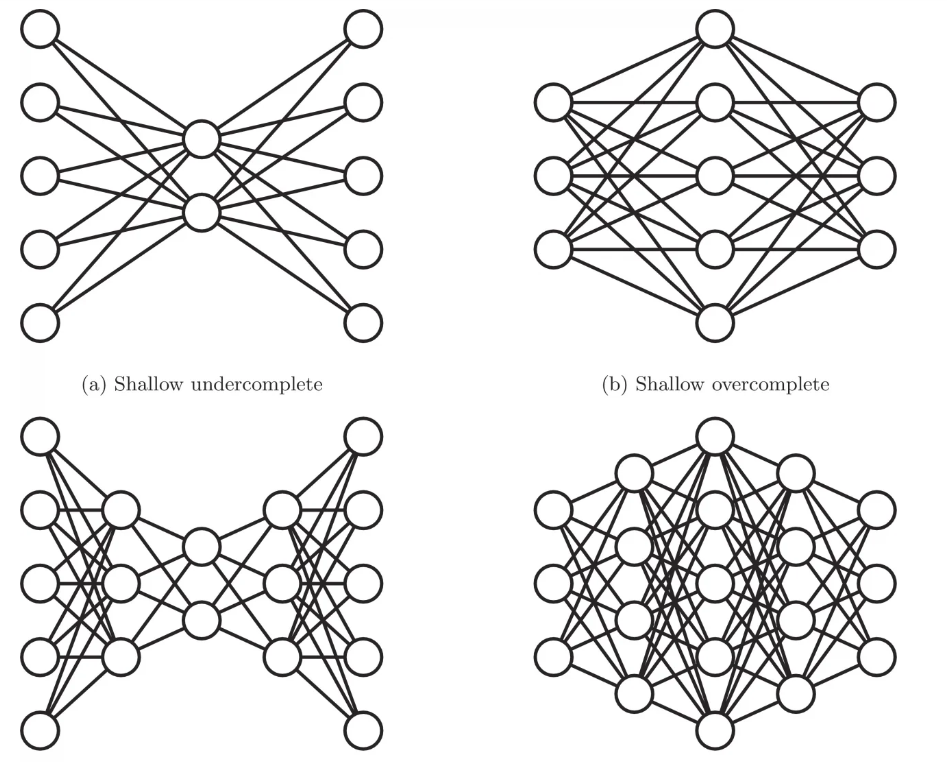

[Source](https://medium.com/@soumallya160/the-basic-concept-of-autoencoder-the-self-supervised-deep-learning-454e75d93a04)

Import the libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Define an undercomplete autoencoder

In [7]:
# Define the Undercomplete Autoencoder Architecture
class UndercompleteAutoencoder(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, latent_dim=32):
        super(UndercompleteAutoencoder, self).__init__()
        # Encoder: Maps input to latent space (compression)
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim) , # TODO: Add a linear layer transforming input_dim to hidden_dim
            nn.ReLU() , # TODO: Add a ReLU activation function
            nn.Linear(hidden_dim, latent_dim) # TODO: Add a linear layer transforming hidden_dim to latent_dim
        )

        # Decoder: Reconstructs input from latent space
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim) , # TODO: Add a linear layer transforming latent_dim to hidden_dim
            nn.ReLU(), # TODO: Add a ReLU activation function
            nn.Linear(hidden_dim, input_dim), # TODO: Add a linear layer transforming hidden_dim to input_dim
            nn.Sigmoid()  # TODO: Use Sigmoid to output values between 0 and 1 (like images)
        )

    def forward(self, x):
        x = self.encoder(x) # TODO: Pass the input 'x' to the encoder
        x = self.decoder(x) # TODO: Pass the encoded 'x' to the decoder 
        return x

Load the data and create an autoencoder

In [12]:
# Hyperparameters
input_dim = 28 * 28  # For MNIST (28x28 images)
hidden_dim = 128
latent_dim = 2
num_epochs = 10
batch_size = 64
learning_rate = 1e-3

# Data Preparation (MNIST Dataset)
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # TODO: Create train dataloader

# Initialize the autoencoder model, optimizer, and loss function
model = UndercompleteAutoencoder(input_dim=input_dim, hidden_dim=hidden_dim, latent_dim=latent_dim) # TODO: Create the autoencoder
criterion = nn.MSELoss() # TODO: What loss function do we usually use for autoencoders? Set this loss function 
optimizer = optim.Adam(model.parameters(), lr=learning_rate) # TODO: Set an optimizer

# TODO: Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TODO: Move the model to the device
model.to(device)


UndercompleteAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

Train the autoencoder

In [ ]:
for epoch in range(num_epochs):

    # TODO: Set the model to the training mode
    model.train()

    train_loss = 0
    for data, _ in train_loader:

        # TODO: Move the data to the appropriate device
        data = data.to(device)
        
        # TODO: Forward pass
        outputs = model(data)

        # TODO: Calculating loss
        loss = criterion(outputs, data)
        
        # TODO: Zero out the gradients
        optimizer.zero_grad()

        # TODO: Do backward pass
        loss.backward()

        # TODO: Update model weights
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

Epoch [1/10], Loss: 0.0574
Epoch [2/10], Loss: 0.0488
Epoch [3/10], Loss: 0.0473
Epoch [4/10], Loss: 0.0464
Epoch [5/10], Loss: 0.0456
Epoch [6/10], Loss: 0.0450
Epoch [7/10], Loss: 0.0444
Epoch [8/10], Loss: 0.0439
Epoch [9/10], Loss: 0.0434
Epoch [10/10], Loss: 0.0431


Now we can use the encoder of the autoencoder to reduce the dimensionality of the input data

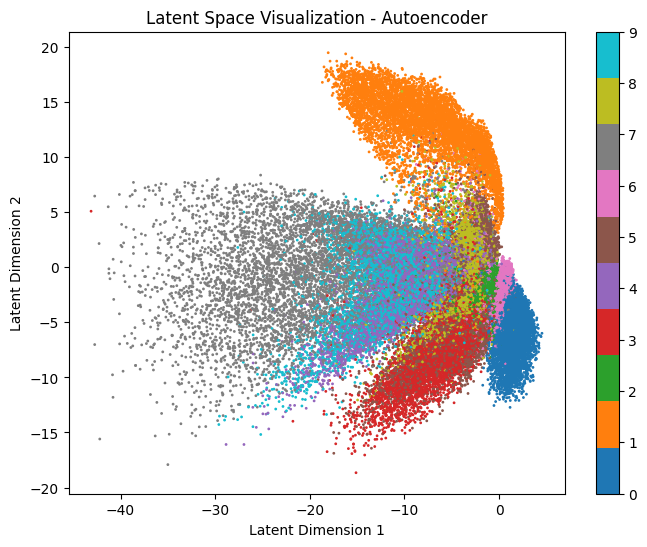

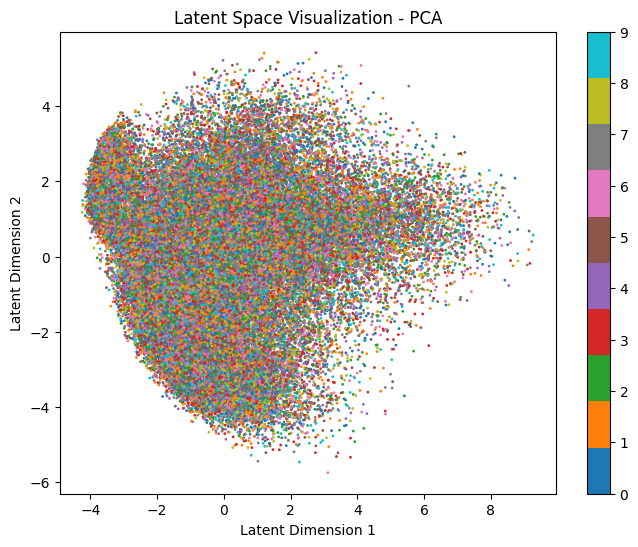

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -------------------------------------------------
# Dimensionality Reduction using the Trained Autoencoder
# -------------------------------------------------

# Function to extract latent space representation
def extract_latent_space(model, data_loader):
    model.eval()
    latent_vectors = []
    labels = []
    with torch.no_grad():
        for data, target in data_loader:
            data = data.to(device)
            latent = model.encoder(data)
            latent_vectors.append(latent.cpu())
            labels.append(target)
    latent_vectors = torch.cat(latent_vectors)
    labels = torch.cat(labels)
    return latent_vectors.numpy(), labels.numpy()

# Extract latent space representation using autoencoder
latent_vectors_autoencoder, labels = extract_latent_space(model, train_loader)

# -------------------------------------------------
# Dimensionality Reduction using PCA
# -------------------------------------------------

# Function to extract original data from DataLoader
def extract_original_data(data_loader):
    data_list = []
    for data, _ in data_loader:
        data_list.append(data.view(data.size(0), -1).numpy())
    return np.concatenate(data_list, axis=0)

import numpy as np
# Extract original data
original_data = extract_original_data(train_loader)

# Apply PCA to the original data to reduce to 2 dimensions
pca = PCA(n_components=2)
latent_vectors_pca = pca.fit_transform(original_data)

# -------------------------------------------------
# Plot Latent Representations (Autoencoder vs PCA)
# -------------------------------------------------
def plot_latent_space(latent_vectors, labels, method_name):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(latent_vectors[:, 0], latent_vectors[:, 1], c=labels, cmap='tab10', s=1)
    plt.colorbar(scatter)
    plt.title(f'Latent Space Visualization - {method_name}')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.show()

# Plot latent space from autoencoder
plot_latent_space(latent_vectors_autoencoder, labels, 'Autoencoder')

# Plot latent space from PCA
plot_latent_space(latent_vectors_pca, labels, 'PCA')

## Sparse autoencoder

A sparse autoencoder is a variant of the traditional autoencoder that imposes sparsity on the hidden (latent) layer. Sparsity means that only a small number of neurons in the hidden layer are active (non-zero) at any given time for a specific input, even if the hidden layer has many neurons. This constraint forces the model to learn more efficient, meaningful representations of the data, ensuring that only the most important features are activated. Sparse autoencoders are valuable in several scenarios where feature learning or extracting key underlying patterns from the data is important.

One common way to enforce sparsity in an autoencoder is to apply **L1 regularization** to the activations of the neurons in the latent layer. L1 regularization encourages many of the activations to be zero or close to zero, thereby enforcing sparsity

$$
L_{\text{total}} = L(x, \hat{x}) + \lambda \sum_{i=1}^{N} |h_i|
$$

Where:
- $L(x, \hat{x})$ is the reconstruction loss (e.g., mean squared error).
- $\lambda$ is a regularization weight controlling the influence of the sparsity penalty.
- $h_i$ is the activation of the hidden neuron $i$

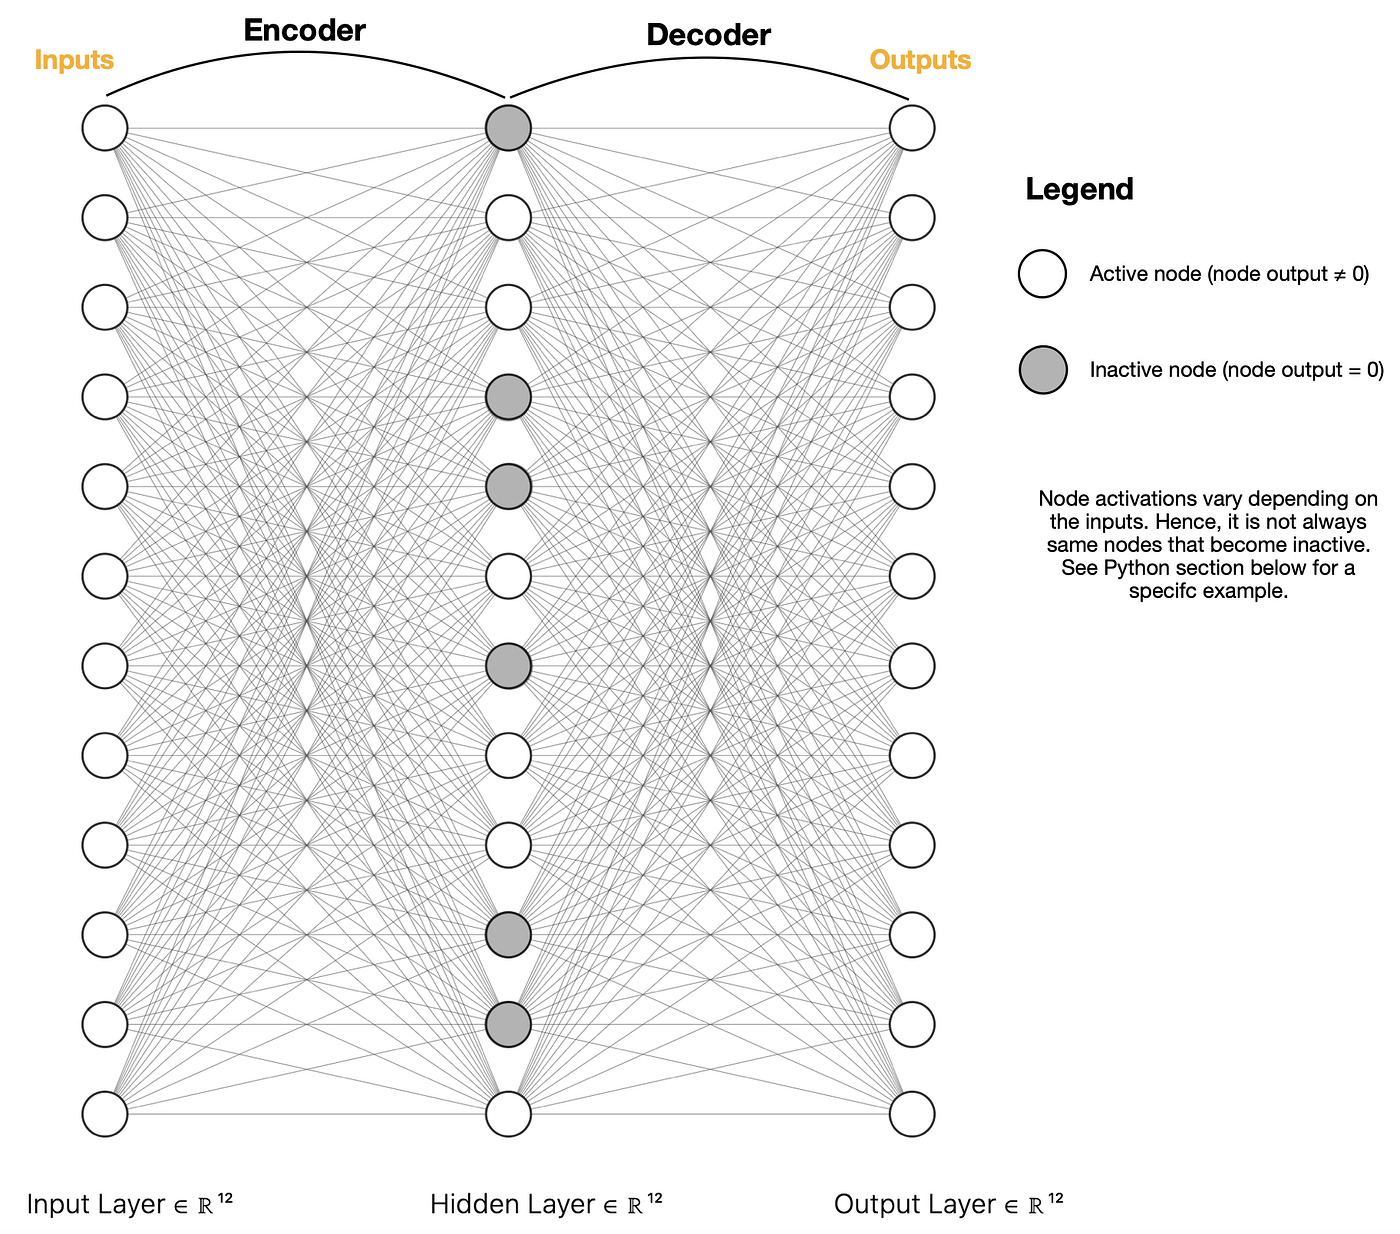

[Source](https://towardsdatascience.com/sparse-autoencoder-neural-networks-how-to-utilise-sparsity-for-robust-information-encoding-6aa9ff542bc9)

Load the necessary libraries

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Build a sparse autoencoder

In [24]:
# Sparse Autoencoder Model
class SparseAutoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SparseAutoencoder, self).__init__()
        self.input_size = input_size 
        # Encoder
        self.encoder = nn.Linear(input_size, hidden_size) # TODO: Create an encoder as a linear layer transforming input_size to hidden_size
        
        # Decoder
        self.decoder = nn.Linear(hidden_size, input_size) # TODO: Create a decoder as a linear layer transforming hidden_size to input_size

    def forward(self, x):
        
        # TODO: Flatten the input image to a vector
        x = x.view(-1, self.input_size)
        
        # TODO: Encode 'x' and apply ReLU
        encoded = torch.relu(self.encoder(x))
        
        # TODO: Decode 'encoded' and appy Sigmoid function
        decoded = torch.sigmoid(self.decoder(encoded))

        return encoded, decoded

# Loss function with sparsity constraint
def loss_function(x, reconstructed_x, encoded, sparsity_lambda):
    
    # TODO: Calculate reconstruction loss (Mean Squared Error)
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction='mean')
    
    # TODO: Calculate sparsity loss (L1 norm of the 'encoded' values)
    # Also, don't forget to scale the sparsity loss by sparsity_lambda 
    sparsity_loss = sparsity_lambda * torch.mean(torch.abs(encoded))
    
    # TODO: Return the total loss as the sum of the reconstruction loss and the sparsity loss
    return reconstruction_loss + sparsity_loss

Load the data and set hyperparameters

In [26]:
# Hyperparameters
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 28 * 28    # Number of hidden units
sparsity_lambda = 1e-5 # Sparsity regularization coefficient (L1 penalty)
learning_rate = 1e-3
batch_size = 64
num_epochs = 8

# Transformations for data normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# TODO: Create train and test dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Create a model and optimizer

In [27]:
# TODO: Create autoencoder
model = SparseAutoencoder(input_size=input_size, hidden_size=hidden_size)

# TODO: Set an optimizer
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TODO: Move the model to the device
model.to(device)

SparseAutoencoder(
  (encoder): Linear(in_features=784, out_features=784, bias=True)
  (decoder): Linear(in_features=784, out_features=784, bias=True)
)

Train the sparse autoencoder

In [28]:
# Training function
def train(model, train_loader, num_epochs):
    
    # TODO: Set the model to the training mode
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        for images, _ in train_loader:
            
            
            # TODO: Move images to the appropriate device
            images = images.to(device)

            # TODO: Forward pass
            encoded, decoded = model(images)
            
            # TODO: Calculate loss
            loss = loss_function(images.view(-1, model.input_size), decoded, encoded, sparsity_lambda)
            
            
            # TODO: Zero out the gradients
            optimizer.zero_grad()

            # TODO: Make backpropagation 
            loss.backward()

            # TODO: Update the model weights
            optimizer.step()


            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Train the sparse autoencoder
train(model, train_loader, num_epochs)

Epoch [1/8], Loss: 0.9282
Epoch [2/8], Loss: 0.9254
Epoch [3/8], Loss: 0.9254
Epoch [4/8], Loss: 0.9253
Epoch [5/8], Loss: 0.8836
Epoch [6/8], Loss: 0.8485
Epoch [7/8], Loss: 0.8473
Epoch [8/8], Loss: 0.8468


Now, we can encode the data into sparse representations. This may help to save memory

In [29]:
# Function to encode MNIST images
def encode_mnist_images(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    encoded_images = []

    with torch.no_grad():  # No need to compute gradients during encoding
        for images, _ in data_loader:
            # Pass the images through the autoencoder and get the encoded features
            encoded, _ = model(images.to(device))
            encoded_images.append(encoded)

    # Concatenate the list of encoded images into a single tensor
    encoded_images = torch.cat(encoded_images, dim=0)
    return encoded_images

# Encode the MNIST images using the trained sparse autoencoder
encoded_mnist_images = encode_mnist_images(model, test_loader)

In [30]:
encoded_image = encoded_mnist_images[1]
print("Total number of values:", len(encoded_image))
print("Number of non-zero values:", len(encoded_image[encoded_image > 0]))

Total number of values: 784
Number of non-zero values: 353


## Denoising Autoencoder

A denoising autoencoder (DAE) is a variant of the traditional autoencoder designed to reconstruct the original, clean input data from a noisy, corrupted version of that input. The key idea is to train the autoencoder to remove noise from the data, thereby learning a more robust representation of the underlying patterns. The noise is artificially added to the input during training, and the goal of the autoencoder is to output the denoised version of the input. Denoising autoencoders are useful for noise reduction, robust representation learning, and improving the quality of data used for machine learning models

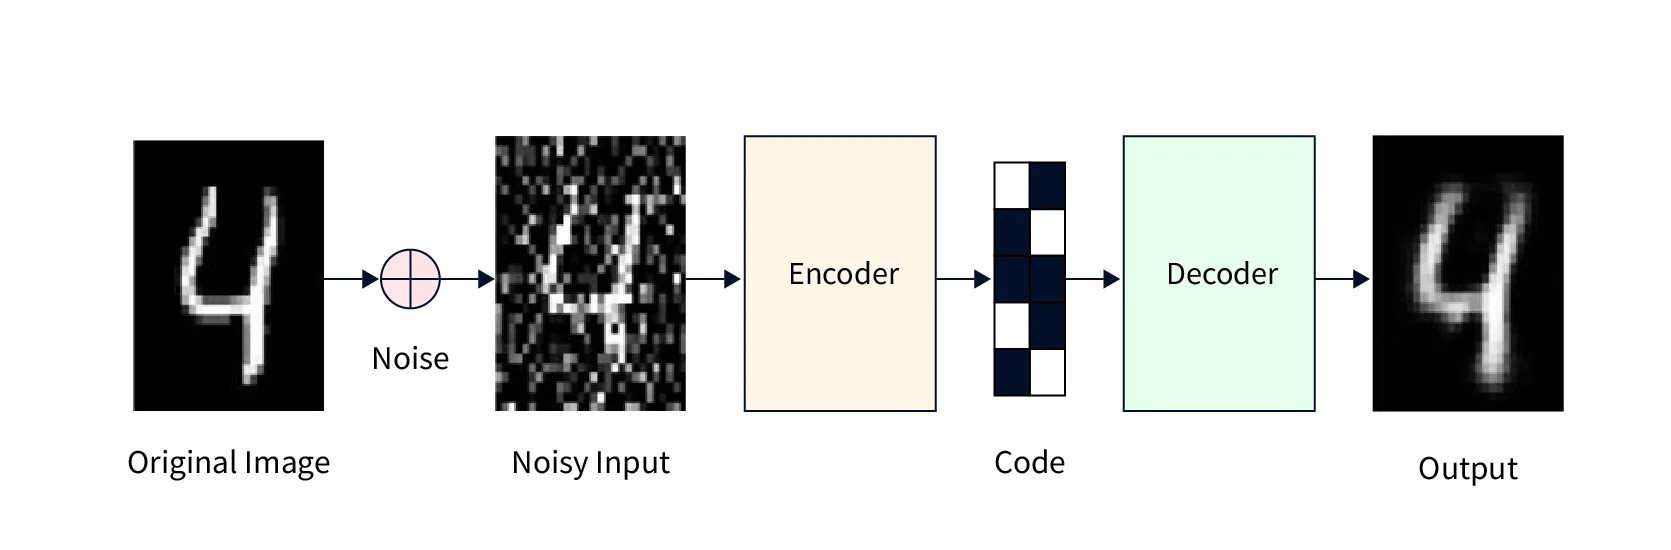

[Source](https://www.scaler.com/topics/deep-learning/denoising-autoencoder/)

Load the necessary libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Build a denoising autoencoder

In [2]:
# Denoising Autoencoder Architecture
class DenoisingAutoencoder(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=128, code_dim=64):
        super(DenoisingAutoencoder, self).__init__()
        
        # Encoder: Compresses the input into latent space (code_dim)
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), # TODO: Add a linear layer transforming input_dim to hidden_dim
            nn.ReLU(), # TODO: Add ReLU activation function
            nn.Linear(hidden_dim, code_dim) , # TODO: Add a linear layer transforming hidden_dim to code_dim
            nn.ReLU() # TODO: Add ReLU activation function
        )
        
        # Decoder: Reconstructs the input from latent space
        self.decoder = nn.Sequential(
            nn.Linear(code_dim, hidden_dim), # TODO: Add a linear layer transforming code_dim to hidden_dim
            nn.ReLU(), # TODO: Add ReLU activation function
            nn.Linear(hidden_dim, input_dim), # TODO: Add a linear layer transforming hidden_dim to input_dim
            nn.Sigmoid()  # TODO: Apply Sigmoid function to output values between 0 and 1
        )

    def forward(self, x):
        
        # TODO: Pass 'x' to the encoder
        encoded = self.encoder(x)

        # TODO: Pass 'encoded' to the decoder
        decoded = self.decoder(encoded)
        
        return decoded

Create a function to add random noise to an image

In [3]:
# Function to add noise to images
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * torch.randn_like(images)
    noisy_images = torch.clamp(noisy_images, 0., 1.)  # Clip the values between 0 and 1
    return noisy_images

Load the data and set the hyperparameters

In [4]:
# Hyperparameters
input_dim = 28*28  # MNIST image size (28x28 pixels)
hidden_dim = 128   # Size of hidden layers
code_dim = 64      # Latent code size
num_epochs = 10
batch_size = 128
learning_rate = 1e-3
noise_factor = 0.5  # Amount of noise to add to the input images

# Prepare MNIST dataset (train + test)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the images to vectors
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# TODO: Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# TODO: Create the autoencoder
model = DenoisingAutoencoder()

# TODO: Create reconstruction loss
criterion = nn.MSELoss()

# TODO: Set the optimizer
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

# TODO: Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TODO: Move the model to the device
model.to(device)

DenoisingAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)

Train the denoising autoencoder

In [6]:
# Training loop
for epoch in range(num_epochs):
    
    # TODO: Set the model to the training mode
    model.train()

    train_loss = 0
    for data, _ in train_loader:
        
        # TODO: Move the data to the device
        data = data.to(device)

        # TODO: Add noise to the input images using 'add_noise' function
        noisy_data = add_noise(data)

        # TODO: Make the forward pass
        reconstructed = model(noisy_data)

        # TODO: Compute loss between the original (clean) images and the reconstruction
        loss = criterion(reconstructed, data)

        # TODO: Zero out the gradients
        optimizer.zero_grad()

        # TODO: Do backpropagation
        loss.backward()

        # TODO: Update model weights
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

Epoch [1/10], Loss: 0.0618
Epoch [2/10], Loss: 0.0353
Epoch [3/10], Loss: 0.0293
Epoch [4/10], Loss: 0.0262
Epoch [5/10], Loss: 0.0243
Epoch [6/10], Loss: 0.0231
Epoch [7/10], Loss: 0.0221
Epoch [8/10], Loss: 0.0211
Epoch [9/10], Loss: 0.0205
Epoch [10/10], Loss: 0.0200


Visualize the noisy and reconstructed images

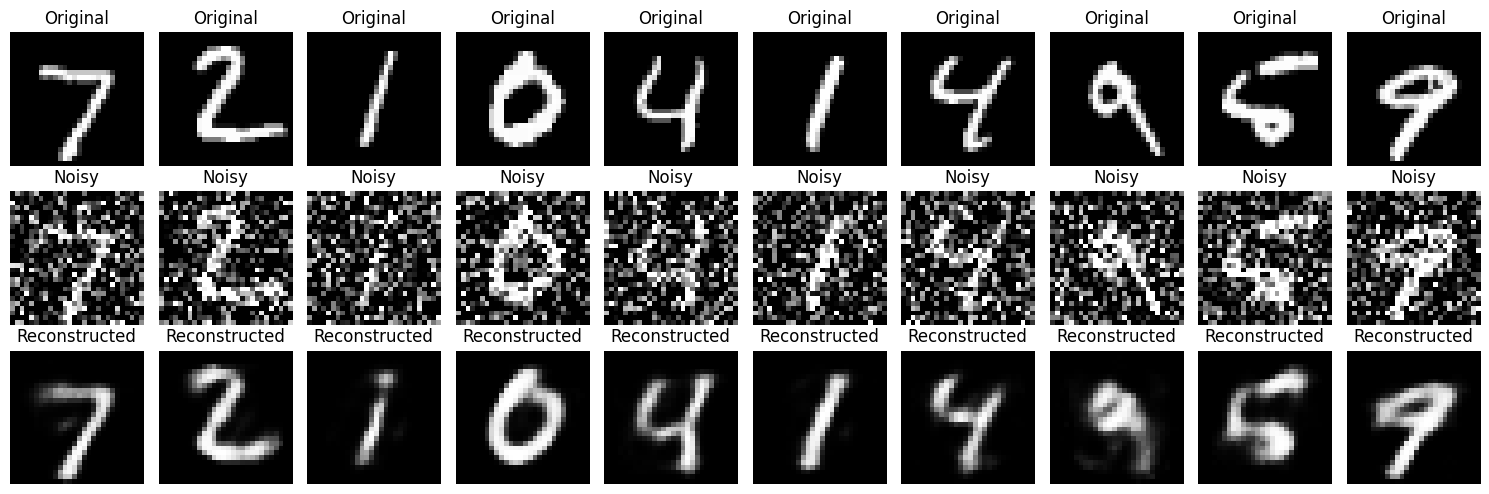

In [7]:
# Function to plot the original, noisy, and reconstructed images
def plot_images(original, noisy, reconstructed, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        # Original images
        plt.subplot(3, n, i+1)
        plt.imshow(original[i], cmap='gray')
        plt.title('Original')
        plt.axis('off')

        # Noisy images
        plt.subplot(3, n, i+1+n)
        plt.imshow(noisy[i], cmap='gray')
        plt.title('Noisy')
        plt.axis('off')

        # Reconstructed images
        plt.subplot(3, n, i+1+2*n)
        plt.imshow(reconstructed[i], cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Get a batch of test images
test_iter = iter(test_loader)
images, _ = next(test_iter)
images = images.to(device)

# Add noise to the images
noisy_images = add_noise(images, noise_factor=noise_factor)

# Reconstruct the noisy images
with torch.no_grad():
    reconstructed_images = model(noisy_images)

# Move tensors to CPU for visualization
images = images.cpu().view(-1, 28, 28)
noisy_images = noisy_images.cpu().view(-1, 28, 28)
reconstructed_images = reconstructed_images.cpu().view(-1, 28, 28)

# Plot the results
plot_images(images, noisy_images, reconstructed_images, n=10)

## Variational Autoencoders (VAE)

A Variational Autoencoder (VAE) is a generative model and a type of autoencoder that learns to represent input data as probabilistic distributions in a continuous latent space. VAEs are a key tool for generating new data points similar to the input data and for unsupervised learning tasks like clustering, anomaly detection, or dimensionality reduction.

The key difference between a traditional autoencoder and a VAE is that in VAEs, the encoder outputs a probability distribution rather than a deterministic latent vector. The model learns to map input data into a latent space described by a mean ($\mu$) and variance ($\sigma$), effectively encoding the data as a probability distribution. The decoder then reconstructs the data by sampling from this latent space.

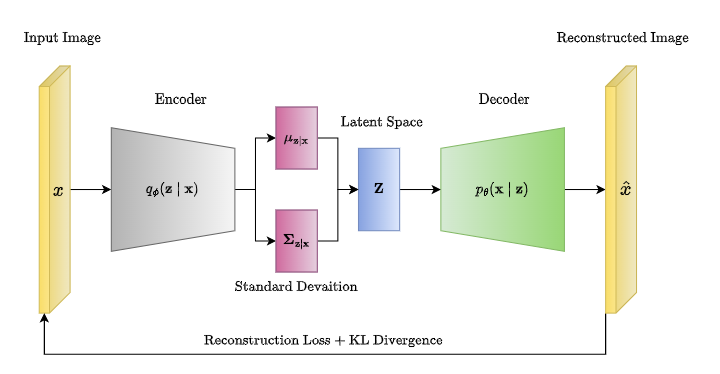

[Source](https://medium.com/@rushikesh.shende/autoencoders-variational-autoencoders-vae-and-%CE%B2-vae-ceba9998773d)

### How VAEs work

1. **Encoding**

 The input is encoded into a latent distribution parameterized by a mean vector $\mu$ and a variance vector $\sigma^2$. Instead of directly encoding to a latent vector, the VAE encodes to a distribution from which we sample latent vectors

2. **Sampling**

 During training, a latent vector is sampled from the encoded distribution using the **reparameterization trick**, which ensures that the model can still be trained using standard backpropagation. The reparameterization trick involves sampling from a unit Gaussian distribution, then transforming this sample using the learned mean and variance:

$$ z = \mu + \sigma \times \epsilon, \quad \epsilon \sim N(0, I) $$

3. **Decoding**

 The sampled latent vector is passed through the decoder to reconstruct the original input. The decoder maps the sampled latent vector back to the original data distribution.

4. **Loss calculation**

 The loss is composed of two parts:

 * *Reconstruction loss*: Measures how well the decoder reconstructs the input. Usually done using mean squared error (MSE) or binary cross-entropy (BCE)

 * *KL divergence loss*: Measures how close the learned latent distribution is to a standard normal distribution. This regularizes the latent space, encouraging it to follow a known distribution (e.g., a Gaussian)

 So, the overall loss function is calculated as:

 $$ \mathcal{L} = \mathcal{L}_{\text{reconst}} + \text{KL}(q(z|x) \| p(z)) $$

 where $q(z|x)$ is the learned latent distribution and $p(z)$ is a prior (typically a unit Gaussian).




Import the necessary libraries

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Build a variational autoencoder

In [9]:
# Define the Variational Autoencoder (VAE)
class VAE(nn.Module):
    def __init__(self, input_dim=28*28, hidden_dim=400, latent_dim=20):
        super(VAE, self).__init__()
        
        # Encoder layers
        # TODO: Create a linear layer transforming input_dim to hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)       # Mean vector
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim) 

    def encode(self, x):

        # TODO: Pass 'x' to 'fc1' layer and apply ReLU
        h1 = nn.functional.relu(self.fc1(x))

        # TODO: Pass 'h1' to 'fc_mu' layer
        mu = self.fc_mu(h1)
        
        # TODO: Pass 'h1' to 'fc_logvar' layer
        logvar = self.fc_logvar(h1)

        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # Standard deviation
        eps = torch.randn_like(std)  # Random normal tensor
        return mu + eps * std  # Sampling from latent space

    def decode(self, z):
        # TODO: Pass 'z' to 'fc3' layer and then apply ReLU
        h3 = nn.functional.relu(self.fc3(z))

        # TODO: Pass 'h3' to 'fc4' layer and then apply sigmoid. Return the result.
        return torch.sigmoid(self.fc4(h3))  # Output values between 0 and 1

    def forward(self, x):

        # TODO: Obtain 'mu' and 'logvar' by encoding 'x'
        mu, logvar = self.encode(x)

        # TODO: Obtain 'z' by reparametrizing using 'mu' and 'logvar'
        z = self.reparameterize(mu, logvar)

        return self.decode(z), mu, logvar

Create a fucntion to calculate the loss of the autoencoder

In [10]:
# Loss function for VAE (reconstruction loss + KL divergence)
def vae_loss(recon_x, x, mu, logvar):
    
    # Reconstruction loss (binary cross-entropy)
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')

    # KL divergence between learned distribution and standard normal distribution
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

Load the data and set the hyperparameters

In [11]:
# Hyperparameters
input_dim = 28*28  # MNIST image size (28x28 pixels)
hidden_dim = 400   # Size of hidden layers
latent_dim = 20    # Latent space size
num_epochs = 20
batch_size = 128
learning_rate = 1e-3

# Prepare MNIST dataset (train + test)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the images to vectors
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# TODO: Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# TODO: Initialize the VAE
model = VAE()

# TODO: Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

# TODO: Create a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TODO: Move the model to the device
model.to(device)

VAE(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc_mu): Linear(in_features=400, out_features=20, bias=True)
  (fc_logvar): Linear(in_features=400, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=400, bias=True)
  (fc4): Linear(in_features=400, out_features=784, bias=True)
)

Train the variational autoencoder

In [12]:
# Training loop
for epoch in range(num_epochs):

    # TODO: Set the model to the training mode
    model.train()

    train_loss = 0
    for data, _ in train_loader:

        # TODO: Move the data to the device
        data = data.to(device)

        # TODO: Make the forward pass
        recon_batch, mu, logvar = model(data)

        # TODO: Calculate the loss using 'vae_loss' function
        loss =  vae_loss(recon_batch, data, mu, logvar)

        # TODO: Zero out the gradients
        optimizer.zero_grad()

        # TODO: DO backpropagation
        loss.backward()

        # TODO: Update the model weights
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}')

Epoch [1/20], Loss: 164.5764
Epoch [2/20], Loss: 121.7768
Epoch [3/20], Loss: 114.7587
Epoch [4/20], Loss: 111.7917
Epoch [5/20], Loss: 109.9973
Epoch [6/20], Loss: 108.8290
Epoch [7/20], Loss: 107.9921
Epoch [8/20], Loss: 107.3202
Epoch [9/20], Loss: 106.7994
Epoch [10/20], Loss: 106.4035
Epoch [11/20], Loss: 106.0652
Epoch [12/20], Loss: 105.7208
Epoch [13/20], Loss: 105.4553
Epoch [14/20], Loss: 105.2107
Epoch [15/20], Loss: 105.0233
Epoch [16/20], Loss: 104.7952
Epoch [17/20], Loss: 104.6068
Epoch [18/20], Loss: 104.4732
Epoch [19/20], Loss: 104.3277
Epoch [20/20], Loss: 104.2042


Let us generate the images using the decoder that we have trained.

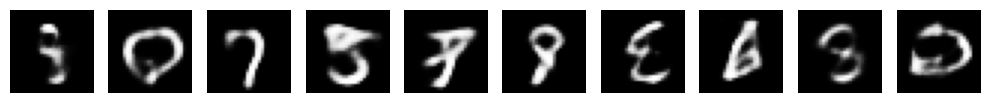

In [16]:
# Generate new images by sampling from the latent space
def generate_images(model, num_images=10):
    with torch.no_grad():
        # Sample from standard normal distribution in the latent space
        z = torch.randn(num_images, latent_dim).to(device)
        generated_images = model.decode(z).cpu().view(-1, 28, 28)  # Reshape back to image size
        return generated_images

# Visualize generated images
def visualize_images(images, n=10):
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate and visualize 10 new images
generated_images = generate_images(model, num_images=10)
visualize_images(generated_images, n=10)